In [ ]:
import pandas as pd
from astropy.io import fits

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import matplotlib

# Set matplotlib parameters
mplparams = {
    'text.usetex': True,  # use LaTeX for all text
    'axes.linewidth': 1,  # set axes linewidths to 1
    'axes.grid': False,  # add a grid
    'axes.labelweight': 'normal',
    'font.family': 'DejaVu Sans',
    'font.size': 16  # Reduced from 22 to prevent overlap
}
matplotlib.rcParams.update(mplparams)
plt.rcParams["mathtext.fontset"] = "cm"


# Load CSV file into a DataFrame
df = pd.read_csv('./data/no_glitch/100-100Hz/signal_glitch_params.csv')
# Display the first few rows
print(df.head())

df2 = pd.read_csv('./data/with_glitch_goodCase/100-100Hz/signal_glitch_params.csv')
# Display the first few rows
print(df2.head())


In [34]:
from pyfstat.utils import get_sft_as_arrays

filename ='/home/hoitim.cheung/SFTs/o4a_data/SFTs/narrowBand_age300yr/240days/H1/100/H-7338_H1_1800SFT_O4RUN+R1+CGDSCALIBSTRAINCLEANGATEDG02+WTKEY5_NBF0099Hz0W0003Hz0-1368980712-20472783.sft'
data = get_sft_as_arrays(filename)

25-09-10 14:54:48.887 pyfstat.utils.sft INFO    : Loading 7338 SFTs from H1...


In [42]:
x = np.diff(data[1]['H1'])

x[x!=1800].size

599

In [55]:
from pyfstat.utils import get_sft_as_arrays

filename ='./data/no_glitch/simCW0/H-4800_H1_1800SFT_simCW0_NBF0449Hz0W0002Hz0-1368970000-8640000.sft'
data = get_sft_as_arrays(filename)

25-09-10 21:43:57.524 pyfstat.utils.sft INFO    : Loading 4800 SFTs from H1...


In [58]:
data[0][0],data[0][-1]

(449.0, 450.99944444444446)

In [90]:
import numpy as np
def grid_size(m, T, factor=1):
    df = 2 * np.sqrt(3*m) / np.pi / T
    df1 = 12 * np.sqrt(5*m) / np.pi / T**2
    df2 = 20 * np.sqrt(7*m) / np.pi / T**3
    return [df*factor, df1*factor, df2*factor]

m = 0.2 
tcoh = 86400*5
factor = 4
dx = grid_size(m, tcoh, factor)

In [121]:
m = 0.2 
tcoh = 86400*5
factor = 4
dx = grid_size(m, tcoh, factor)

In [123]:
homedir = '/home/hoitim.cheung/glitch/'
n = 100

for i in range(n):
    command = (
        f"lalpulsar_Weave "
        f"--output-file={homedir+'results/with_glitch_CW'+{i}+'.fts'} "
        f"--sft-files={homedir+'data/with_glitch/xxx'}' "
        f"--setup-file={homedir}+'metric/metric_5d.fts' "
        f"--semi-max-mismatch=0.2 "
        f"--coh-max-mismatch=0.1 "
        f"--toplist-limit=1000 "
        f"--extra-statistics='coh2F_det,mean2F,coh2F_det,mean2F_det' "
        f"--alpha={df['alpha'][i]}/0 "
        f"--delta={df['delta'][i]}/0 "
        f"--freq={df['f0'][i]-dx[0]}/{2*dx[0]} "
        f"--f1dot={df['f1'][i]-dx[1]}/{2*dx[1]} "
        f"--f2dot={df['f2'][i]-dx[2]}/{2*dx[2]}"
    )

"lalpulsar_Weave --output-file='test_glitch_10d.fts' --sft-files='./data/with_glitch/simCW0/H-4800_H1_1800SFT_simCW0_NBF0449Hz0W0002Hz0-1368970000-8640000.sft' --setup-file='test_metric_10d.fts' --semi-max-mismatch=0.2 --coh-max-mismatch=0.1 --toplist-limit=1000 --extra-statistics='coh2F_det,mean2F,coh2F_det,mean2F_det' --alpha=6.12376766/0 --delta=1.0264611/0 --freq=449.9999988585103/2.2829794224499995e-06 --f1dot=-2.587827352833667e-08/2.046745667334045e-11 --f2dot=-1.6439552550458482e-17/4.671570472091696e-17"

lalpulsar_Weave --output-file='test_glitch.fts' --sft-files='./data/with_glitch/simCW0/H-4800_H1_1800SFT_simCW0_NBF0449Hz0W0002Hz0-1368970000-8640000.sft' --setup-file='test_metric.fts' --semi-max-mismatch=0.2 --coh-max-mismatch=0.1 --toplist-limit=1000 --extra-statistics='coh2F_det,mean2F,coh2F_det,mean2F_det' --alpha=6.12376766/0 --delta=1.0264611/0 --freq=449.9999988585103/2.2829794224499995e-06 --f1dot=-2.587827352833667e-08/2.046745667334045e-11 --f2dot=-1.6439552550458482e-17/4.671570472091696e-17

In [77]:
from astropy.io import fits 


In [81]:
d1 = fits.open('./test.fts')
d2 = fits.open('./test_glitch.fts')

In [83]:
d1[1].data['mean2F'][:5], d2[1].data['mean2F'][:5]

(array([23.370684, 21.537443, 20.785812, 20.640606, 19.693975], dtype='>f4'),
 array([8.86996 , 8.861069, 8.838789, 8.599602, 8.578539], dtype='>f4'))

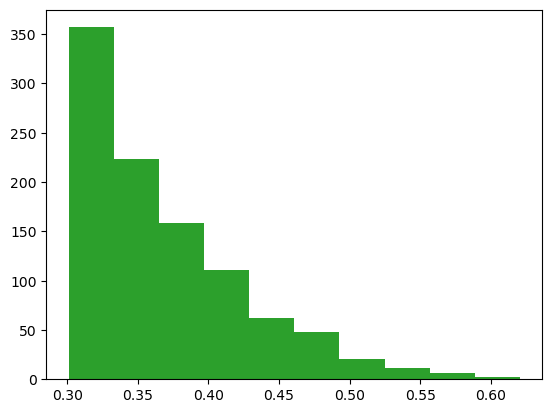

In [87]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist((d1[1].data['mean2F']-d2[1].data['mean2F'])/d1[1].data['mean2F'])
plt.show()

In [115]:
d1 = fits.open('./test_10d.fts')
d2 = fits.open('./test_glitch_10d.fts')

print(d1[1].data['mean2F'][:5], d2[1].data['mean2F'][:5])

[44.852654 41.658066 39.179073 37.83506  37.467773] [14.147722 13.73482  13.731223 13.126192 13.116727]


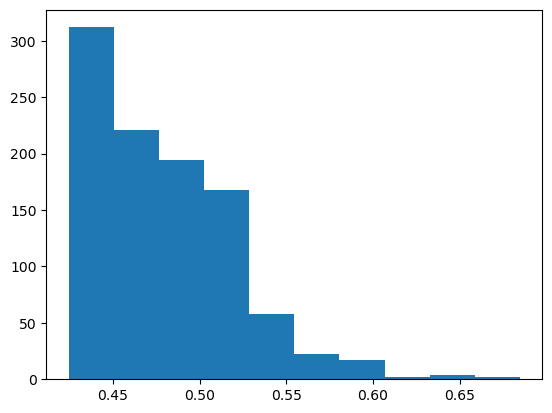

In [116]:
plt.hist((d1[1].data['mean2F']-d2[1].data['mean2F'])/d1[1].data['mean2F'])
plt.show()

[23.370684 21.537443 20.785812 20.640606 19.693975] [44.852654 41.658066 39.179073 37.83506  37.467773]


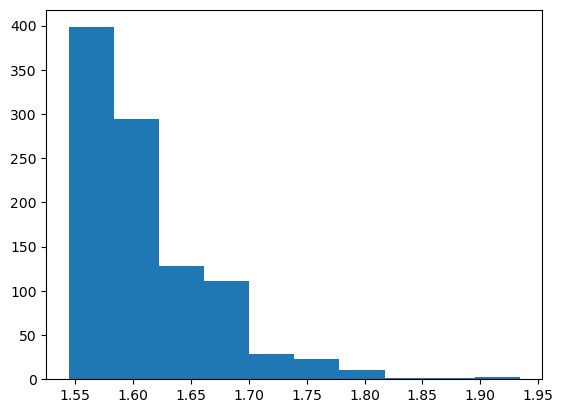

In [103]:
d1 = fits.open('./test.fts')
d2 = fits.open('./test_10d.fts')

print(d1[1].data['mean2F'][:5], d2[1].data['mean2F'][:5])

plt.hist((d2[1].data['mean2F'])/d1[1].data['mean2F'])
plt.show()

In [ ]:
d1 = fits.open('./test_glitch.fts')
d2 = fits.open('./test_glitch_10d.fts')

print(d1[1].data['mean2F'][:5], d2[1].data['mean2F'][:5])

plt.hist((d2[1].data['mean2F'])/d1[1].data['mean2F'])
plt.show()

   n_th_signal  m_th_glitch     f0            f1            f2   f3   f4  \
0            0            0  100.0 -5.748453e-09  1.537400e-18  0.0  0.0   
1            0            1  100.0 -5.748453e-09  1.537400e-18  0.0  0.0   
2            1            0  100.0 -4.561623e-09  2.883667e-18  0.0  0.0   
3            1            1  100.0 -4.561623e-09  2.883667e-18  0.0  0.0   
4            2            0  100.0 -1.037132e-08  6.420693e-18  0.0  0.0   

       phi0       psi      cosi     alpha     delta     tglitch          df_p  \
0  3.685169  0.251600  0.394858  6.123768  1.026461  1370578707  1.182976e-07   
1  3.685169  0.251600  0.394858  6.123768  1.026461  1377129377  8.074021e-08   
2  0.126339 -0.329745 -0.092915  6.123768  1.026461  1372233775  7.836337e-09   
3  0.126339 -0.329745 -0.092915  6.123768  1.026461  1370521775  1.753903e-08   
4  5.208384  0.185378  0.444111  6.123768  1.026461  1374698995  1.612728e-08   

           df_t         df1_p        tau         Q  tgli

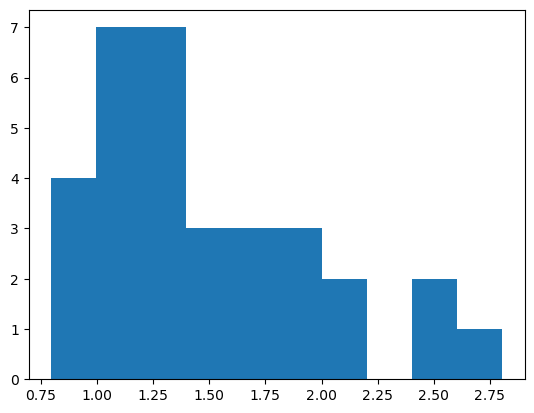

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./data/with_glitch_goodCase/100-100Hz/signal_glitch_params.csv')
# Display the first few rows
print(df.head())


n_glitch = 2 # n glitch per signal 

f0 = df['f0'][::2] # size of 32
f1 = df['f1'][::2] 
f2 = df['f2'][::2]

df_p = df['df_p'] # size of 64
df_t = df['df_t']
df1_p = df['df1_p']
q = df['Q']



a = []
b = []
for i in range(32):
    d1 = fits.open(f'./results/5d/no_glitch/100-100Hz/no_glitch_CW{i}.fts')
    d2 = fits.open(f'./results/5d/with_glitch_goodCase/100-100Hz/with_glitch_goodCase_CW{i}.fts')

    a.append(d1[1].data['mean2F'][:1])
    b.append(d2[1].data['mean2F'][:1])

a = np.concatenate(a)
b = np.concatenate(b)

plt.hist(a/b)
#plt.xscale('log')
plt.show()

In [10]:
i = 0
d1 = fits.open(f'./results/5d/no_glitch/100-100Hz/no_glitch_CW{i}.fts')
d2 = fits.open(f'./results/5d/with_glitch_goodCase/100-100Hz/with_glitch_goodCase_CW{i}.fts')


In [11]:
# Assuming data is your list of 20 numbers
data = d1[1].data['coh2F_H1'][0]  # Replace with your actual data
df = pd.read_csv('./data/no_glitch/100-100Hz/signal_glitch_params.csv')
# Placeholder headers and data
headers = ['f0', 'f1', 'f2']
# Determine field width (enough for headers or formatted numbers)
field_width = max(max(len(h) for h in headers), 8)  # 8 for numbers like "12.34567"

# Print headers
print(' || '.join(f'{h:>{field_width}}' for h in headers))

# Print data with 5 decimal places
print(' || '.join(f'{x:>{field_width}.2e}' for x in df.iloc[0][2:5]))


print('No glitch:')
for i in range(0, 20, 5):
    print(f"{data[i]:>8.5f} || {data[i+1]:>8.5f} || {data[i+2]:>8.5f} || {data[i+3]:>8.5f} || {data[i+4]:>8.5f}")

      f0 ||       f1 ||       f2
1.00e+02 || -5.75e-09 || 1.54e-18
No glitch:
29.65469 || 15.20617 || 18.12902 || 33.59888 ||  8.23655
17.59608 || 39.88800 || 15.79739 || 21.52330 ||  8.93717
21.17100 || 31.51327 || 39.48657 || 36.32507 ||  9.93240
20.90150 || 38.38720 || 27.03888 || 14.93535 || 24.38335


In [266]:
# Assuming data is your list of 20 numbers
data = d2[1].data['coh2F_H1'][0]  # Replace with your actual data

df = pd.read_csv('./data/with_glitch_goodCase/100-100Hz/signal_glitch_params.csv')
# Placeholder headers and data
headers = ['f0', 'f1', 'f2']
# Determine field width (enough for headers or formatted numbers)
field_width = max(max(len(h) for h in headers), 8)  # 8 for numbers like "12.34567"


# Print headers
print(' || '.join(f'{h:>{field_width}}' for h in headers))

# Print data with 5 decimal places
print(' || '.join(f'{x:>{field_width}.2e}' for x in df.iloc[0][2:5]))




headers = ['df_p', 'df_t', 'df1_p', 'tau', 'Q']
# Print headers
print(' || '.join(f'{h:>{field_width}}' for h in headers))

# Print data with 5 decimal places
print(' || '.join(f'{x:>{field_width}.2e}' for x in df.iloc[0][-6:-1]))



print('With glitch:')
for i in range(0, 20, 5):
    print(f"{data[i]:>8.5f} || {data[i+1]:>8.5f} || {data[i+2]:>8.5f} || {data[i+3]:>8.5f} || {data[i+4]:>8.5f}")

      f0 ||       f1 ||       f2
1.00e+02 || -5.75e-09 || 1.54e-18
    df_p ||     df_t ||    df1_p ||      tau ||        Q
1.18e-07 || 6.47e-07 || -8.75e-13 || 1.73e+06 || 8.45e-01
With glitch:
12.25860 || 19.52756 || 21.28053 ||  5.73542 ||  4.98318
27.84089 || 27.55397 || 42.60828 || 35.69203 || 31.24931
22.53534 || 11.36275 || 31.48980 || 31.82900 || 17.52702
30.93760 || 30.67616 || 21.15767 || 20.24260 || 16.56421


t_glitch (day) 18, 94

segment 4 and 19

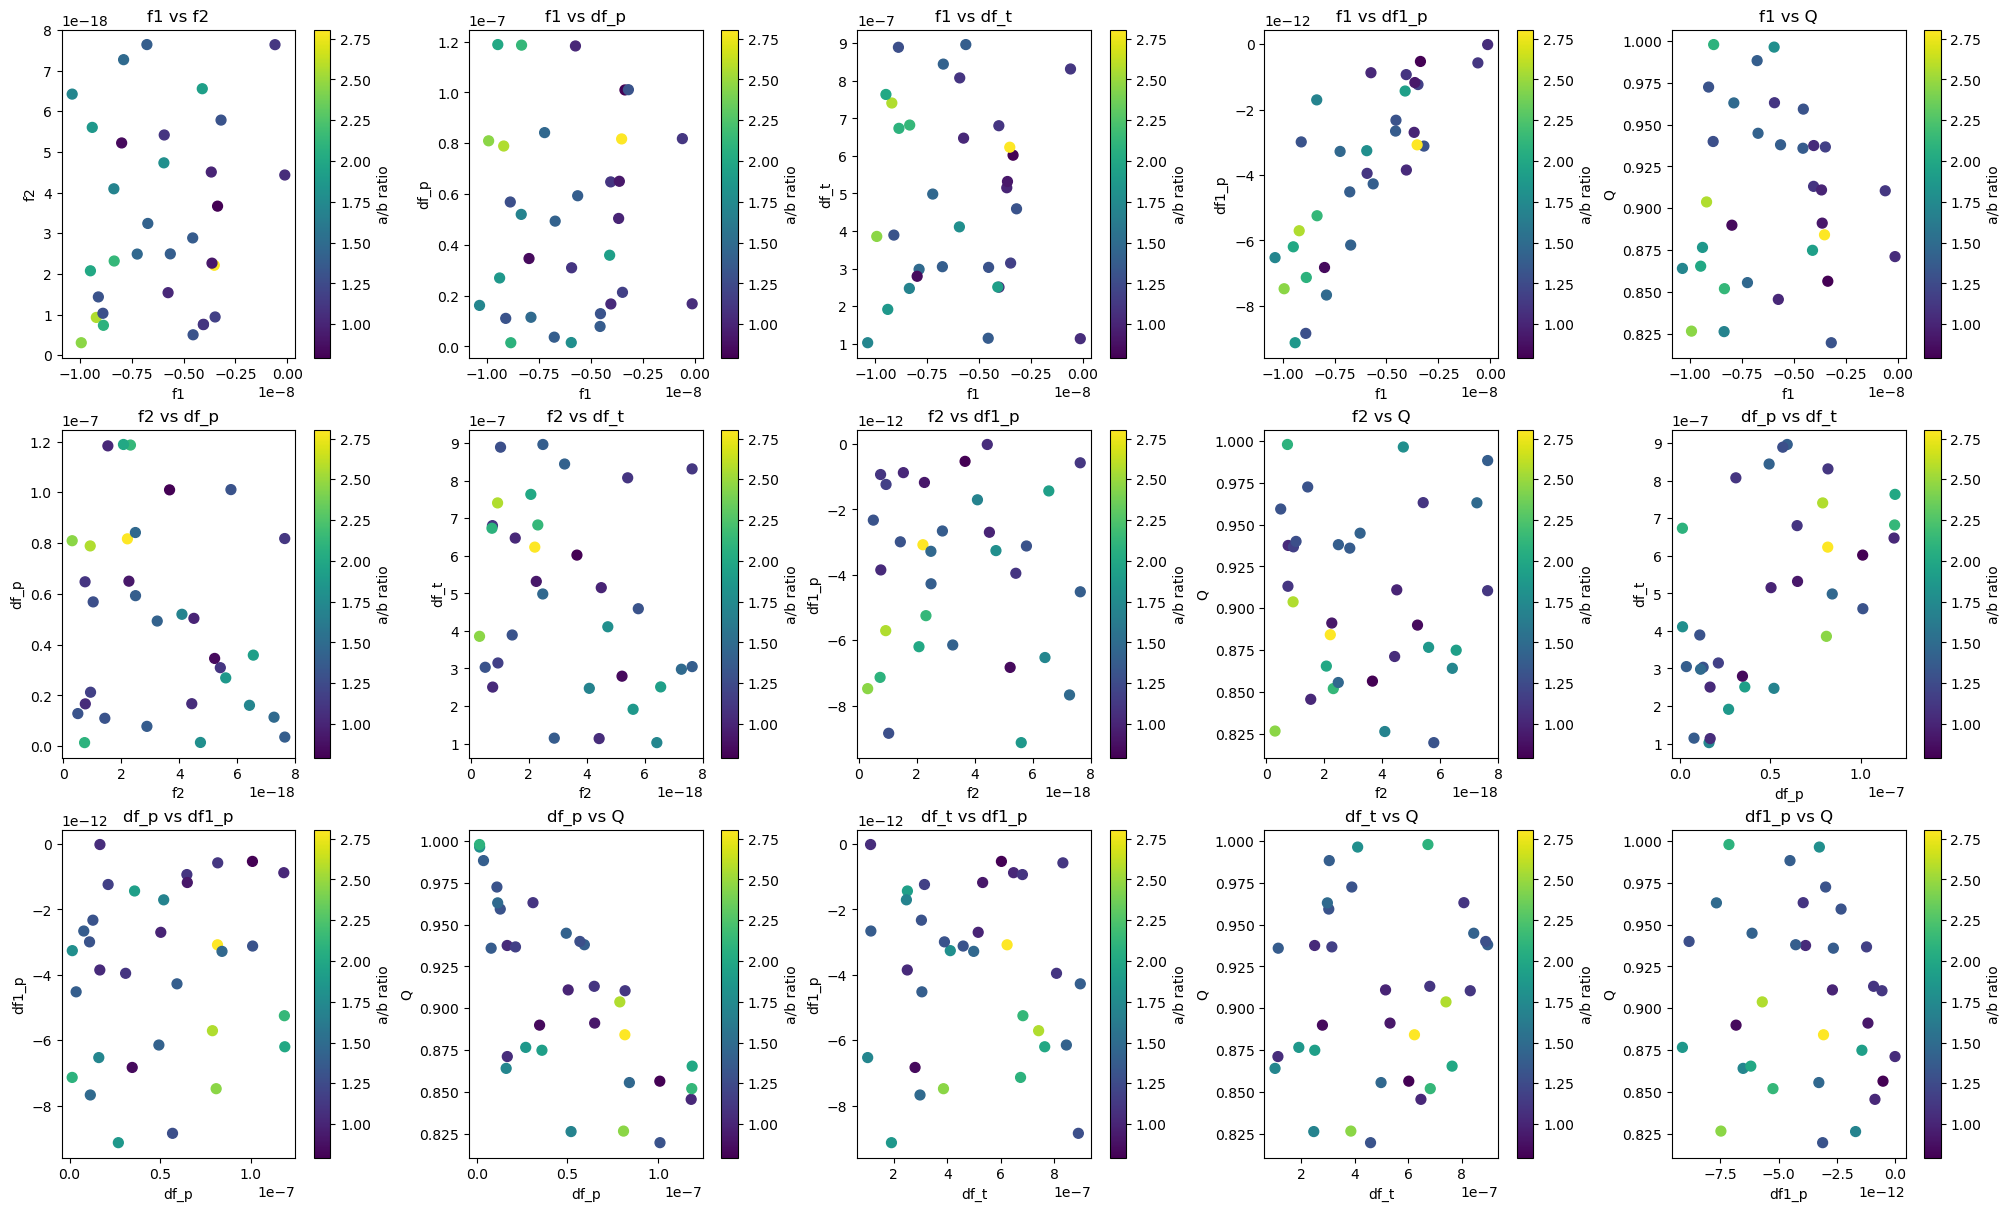

In [219]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import itertools

# Load the CSV file
df = pd.read_csv('./data/with_glitch_goodCase/100-100Hz/signal_glitch_params.csv')

# Extract parameters
n_glitch = 2  # n glitch per signal
f0 = df['f0'][::2].values  # size of 32
f1 = df['f1'][::2].values
f2 = df['f2'][::2].values
df_p = df['df_p'].values[::2]  # Take every other to match size 32
df_t = df['df_t'].values[::2]
df1_p = df['df1_p'].values[::2]
q = df['Q'].values[::2]

# Load data from FITS files and compute a/b
a = []
b = []
for i in range(32):
    d1 = fits.open(f'./results/5d/no_glitch/100-100Hz/no_glitch_CW{i}.fts')
    d2 = fits.open(f'./results/5d/with_glitch_goodCase/100-100Hz/with_glitch_goodCase_CW{i}.fts')
    a.append(d1[1].data['mean2F'][:1])
    b.append(d2[1].data['mean2F'][:1])

a = np.concatenate(a)
b = np.concatenate(b)
ratio = a / b

# Define parameters for plotting
params = {'f1': f1, 'f2': f2, 'df_p': df_p, 'df_t': df_t, 'df1_p': df1_p, 'Q': q}
param_names = list(params.keys())
combinations = list(itertools.combinations(param_names, 2))

# Create a figure with a grid of subplots
n_cols = 5
n_rows = int(np.ceil(len(combinations) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 4), constrained_layout=True)

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot each combination
for idx, (x_param, y_param) in enumerate(combinations):
    ax = axes[idx]
    scatter = ax.scatter(params[x_param], params[y_param], c=ratio, cmap='viridis', s=50)
    ax.set_xlabel(x_param)
    ax.set_ylabel(y_param)
    ax.set_title(f'{x_param} vs {y_param}')
    fig.colorbar(scatter, ax=ax, label='a/b ratio')

# Hide unused subplots
for idx in range(len(combinations), len(axes)):
    axes[idx].set_visible(False)

plt.show()

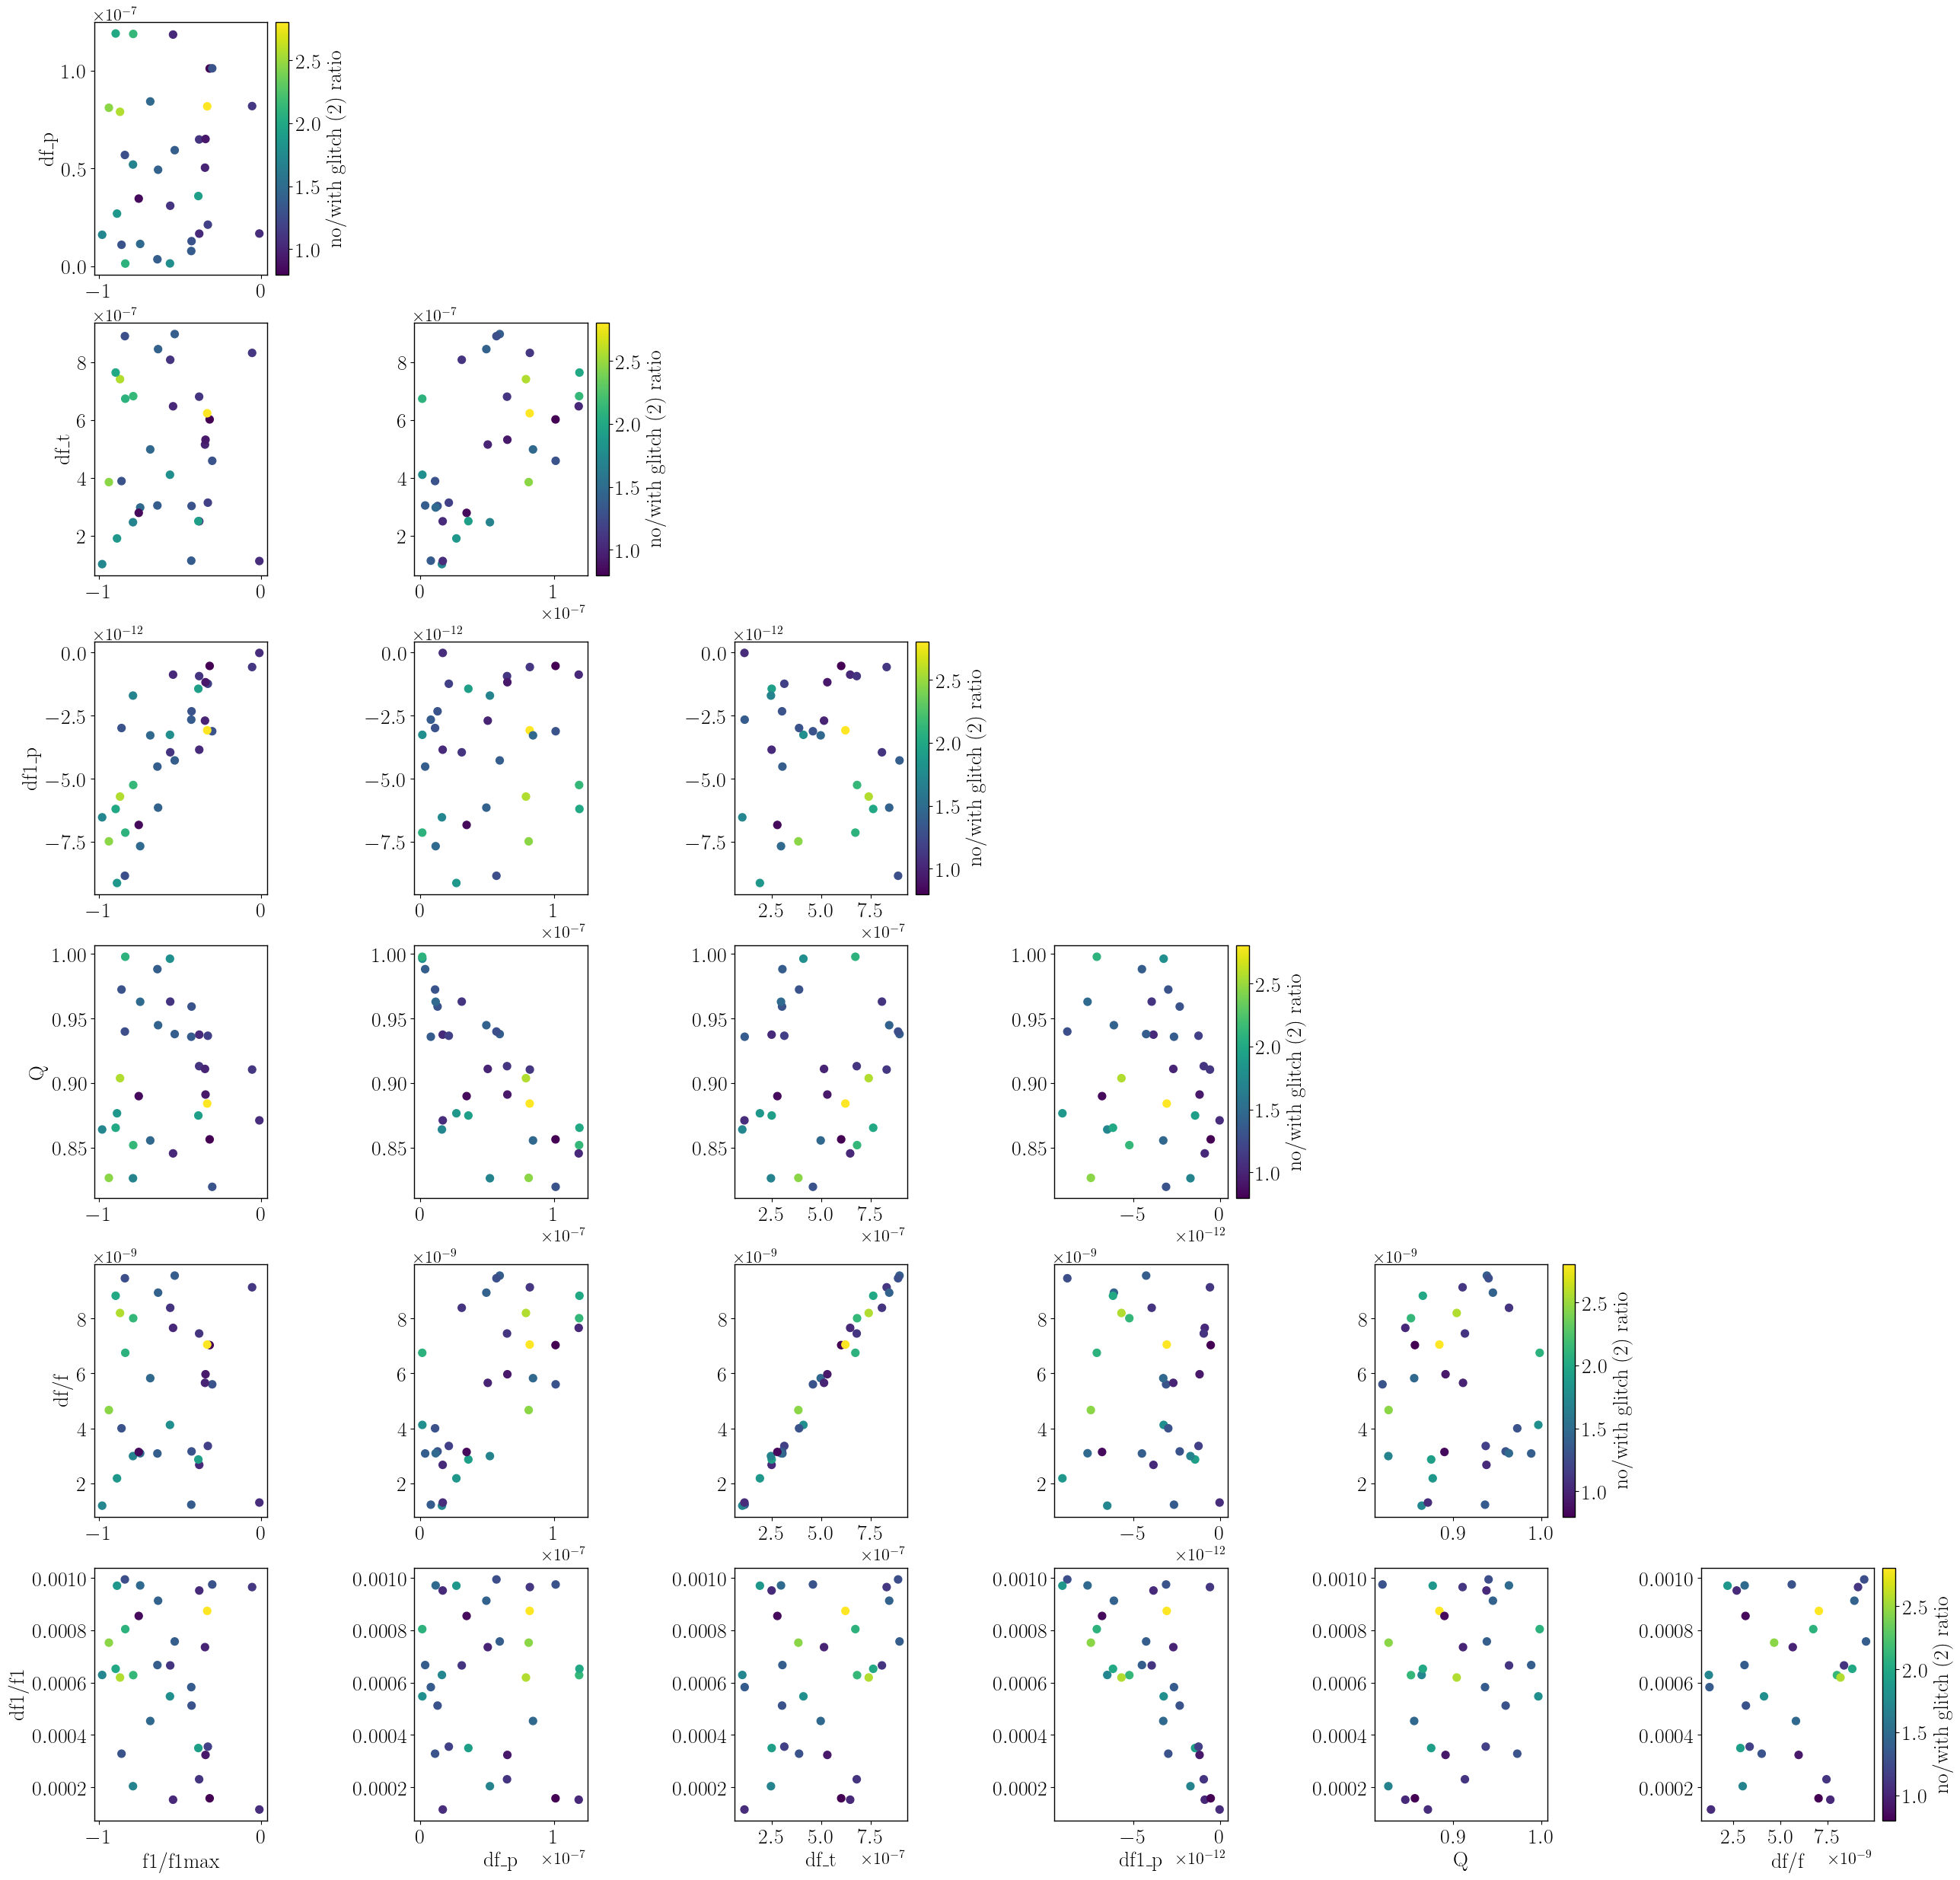

In [237]:

# Load the CSV file
df = pd.read_csv('./data/with_glitch_goodCase/100-100Hz/signal_glitch_params.csv')

# Extract parameters
n_glitch = 2  # n glitch per signal
f0 = df['f0'][::2].values  # size of 32
f1 = df['f1'][::2].values
f2 = df['f2'][::2].values
df_p = df['df_p'].values[::2]  # Take every other to match size 32
df_t = df['df_t'].values[::2]
df1_p = df['df1_p'].values[::2]
q = df['Q'].values[::2]

# Load data from FITS files and compute a/b
a = []
b = []
for i in range(32):
    d1 = fits.open(f'./results/5d/no_glitch/100-100Hz/no_glitch_CW{i}.fts')
    d2 = fits.open(f'./results/5d/with_glitch_goodCase/100-100Hz/with_glitch_goodCase_CW{i}.fts')
    a.append(d1[1].data['mean2F'][:1])
    b.append(d2[1].data['mean2F'][:1])

a = np.concatenate(a)
b = np.concatenate(b)
ratio = a / b

# Define parameters for plotting
params = {
    'f1/f1max': f1/(f0/(300*86400*365)),
    'df_p': df_p,
    'df_t': df_t,
    'df1_p': df1_p,
    'Q': q,
    'df/f': (df_p+df_t)/f0,
    'df1/f1': df1_p/f1
}
param_names = list(params.keys())
n_params = len(param_names)

# Create a figure with a grid of subplots
fig, axes = plt.subplots(n_params, n_params, figsize=(n_params * 4, n_params * 4), constrained_layout=True)

# Plot each combination in the lower triangle
for i in range(n_params):
    for j in range(n_params):
        ax = axes[i, j]
        if j < i:  # Lower triangle (excluding diagonal)
            scatter = ax.scatter(params[param_names[j]], params[param_names[i]], c=ratio, cmap='viridis', s=50)
            ax.set_xlabel(param_names[j] if i == n_params-1 else '', fontsize=20)
            ax.set_ylabel(param_names[i] if j == 0 else '', fontsize=20)
            ax.tick_params(axis='both', labelsize=20)
            # Add colorbar only for the rightmost column in the lower triangle
            if j == i-1:
                cbar = fig.colorbar(scatter, ax=ax, label='no/with glitch (2) ratio')
                cbar.ax.tick_params(labelsize=20)
                cbar.set_label('no/with glitch (2) ratio', fontsize=20)
        else:
            ax.set_visible(False)  # Hide upper triangle and diagonal
plt.savefig('100good.pdf')
plt.show()

In [65]:
# Load the CSV file
df = pd.read_csv('./data/with_glitch_onlytglitch/100-100Hz/signal_glitch_params.csv')

# Extract parameters
n_glitch = 1  # n glitch per signal
f0 = df['f0'][::n_glitch].values # size of 32
f1 = df['f1'][::n_glitch].values
f2 = df['f2'][::n_glitch].values
df_p = df['df_p'].values # Take every other to match size 32
df_t = df['df_t'].values
df1_p = df['df1_p'].values
q = df['Q'].values

t_glitch = df['tglitch_day'].values

a = np.zeros((32,20))
b = np.zeros((32,20))
f0_list = np.zeros((32,2))
f1_list = np.zeros((32,2))
f2_list = np.zeros((32,2))
for i in range(32):
    d1 = fits.open(f'./results/5d/no_glitch/100-100Hz/no_glitch_CW{i}.fts')
    d2 = fits.open(f'./results/5d/with_glitch_onlytglitch/100-100Hz/with_glitch_onlytglitch_CW{i}.fts')

    a[i] = d1[1].data['coh2F_H1'][0]
    b[i] = d2[1].data['coh2F_H1'][0]
    
    f0_list[i,0] = d1[1].data['freq'][0]
    f1_list[i,0] = d1[1].data['f1dot'][0]
    f2_list[i,0] = d1[1].data['f2dot'][0]
    
    f0_list[i,1] = d2[1].data['freq'][0]
    f1_list[i,1] = d2[1].data['f1dot'][0]
    f2_list[i,1] = d2[1].data['f2dot'][0]
    

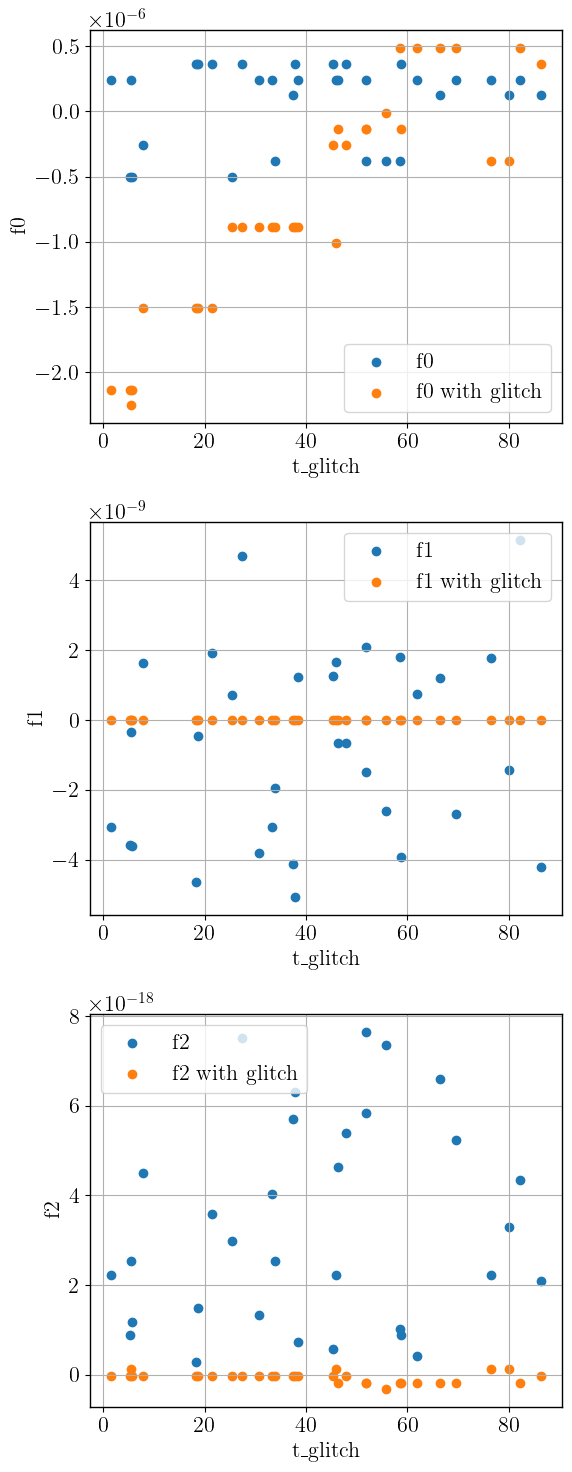

In [78]:
data = [f0_list, f1_list, f2_list]
truth = [f0, f1, f2]
# Create a 1x3 subplot layout
fig, axs = plt.subplots(3, 1, figsize=(6, 15))

for i, (ax, fdata, t) in enumerate(zip(axs, data, truth)):
    ax.scatter(t_glitch, (fdata[:, 0] - t), label=f'f{i}')
    ax.scatter(t_glitch, (fdata[:, 1] - t), label=f'f{i} with glitch')
    ax.set_xlabel('t_glitch')
    ax.set_ylabel(f'f{i}')
    ax.legend()
    ax.grid(True)


plt.tight_layout()
plt.show()

plt.scatter(t_glitch, a.mean(axis=1), label='no glitch')
plt.scatter(t_glitch, b.mean(axis=1), label='with glitch')

plt.xlabel('t_glitch')
plt.ylabel(r'$\mathcal{F}$')
plt.legend(loc=1)
plt.grid(True)

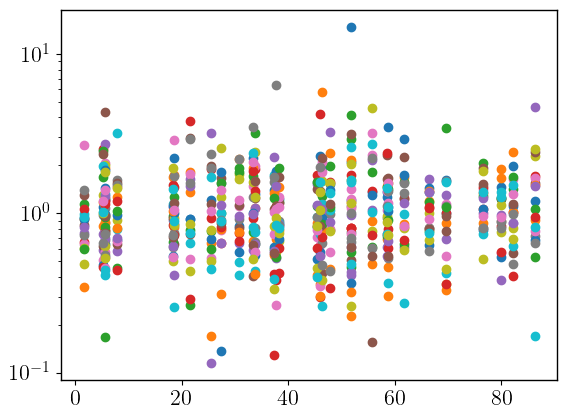

In [91]:
# Compute distance to nearest multiple of 5
nearest_multiple = np.round(t_glitch / 5) * 5 + 2.5
x = t_glitch - nearest_multiple

for i in range(20):
    plt.scatter(t_glitch, a[:,i]/b[:,i])

plt.yscale('log')
# # Generate x-positions for vertical lines at multiples of 5 (from 0 to 50)
# x_lines = range(0, 100, 5)

# # Option 1: Using axvline in a loop (simple for few lines)
# for pos in x_lines:
#     plt.axvline(x=pos, color='red', linestyle='--', alpha=0.7, label='Multiples of 5' if pos == 0 else "")

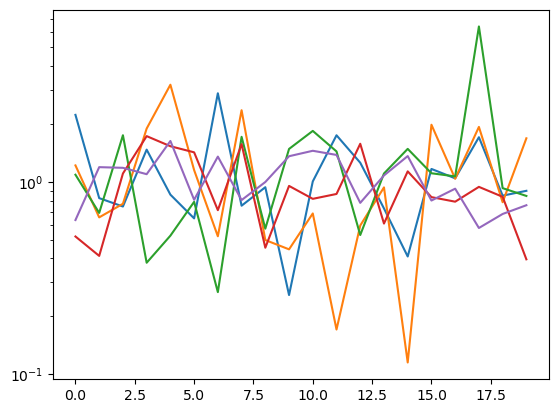

In [39]:
# Compute distance to nearest multiple of 5
nearest_multiple = np.round(t_glitch / 5) * 5 + 2.5
x = t_glitch - nearest_multiple

for i in range(5):
    plt.plot(np.arange(20), a[i]/b[i])

plt.yscale('log')
# # Generate x-positions for vertical lines at multiples of 5 (from 0 to 50)
# x_lines = range(0, 100, 5)

# # Option 1: Using axvline in a loop (simple for few lines)
# for pos in x_lines:
#     plt.axvline(x=pos, color='red', linestyle='--', alpha=0.7, label='Multiples of 5' if pos == 0 else "")



In [94]:
# Load the CSV file
df = pd.read_csv('./data/with_glitch_onlytglitch_consth0/100-100Hz/signal_glitch_params.csv')

# Extract parameters
n_glitch = 1  # n glitch per signal
f0 = df['f0'][::n_glitch].values # size of 32
f1 = df['f1'][::n_glitch].values
f2 = df['f2'][::n_glitch].values
df_p = df['df_p'].values # Take every other to match size 32
df_t = df['df_t'].values
df1_p = df['df1_p'].values
q = df['Q'].values

t_glitch = df['tglitch_day'].values

a = np.zeros((32,20))
b = np.zeros((32,20))
f0_list = np.zeros((32,2))
f1_list = np.zeros((32,2))
f2_list = np.zeros((32,2))
for i in range(32):
    d1 = fits.open(f'./results/5d/no_glitch/100-100Hz/no_glitch_CW{i}.fts')
    d2 = fits.open(f'./results/5d/with_glitch_onlytglitch_consth0/100-100Hz/with_glitch_onlytglitch_consth0_CW{i}.fts')

    a[i] = d1[1].data['coh2F_H1'][0]
    b[i] = d2[1].data['coh2F_H1'][0]
    
    f0_list[i,0] = d1[1].data['freq'][0]
    f1_list[i,0] = d1[1].data['f1dot'][0]
    f2_list[i,0] = d1[1].data['f2dot'][0]
    
    f0_list[i,1] = d2[1].data['freq'][0]
    f1_list[i,1] = d2[1].data['f1dot'][0]
    f2_list[i,1] = d2[1].data['f2dot'][0]
    



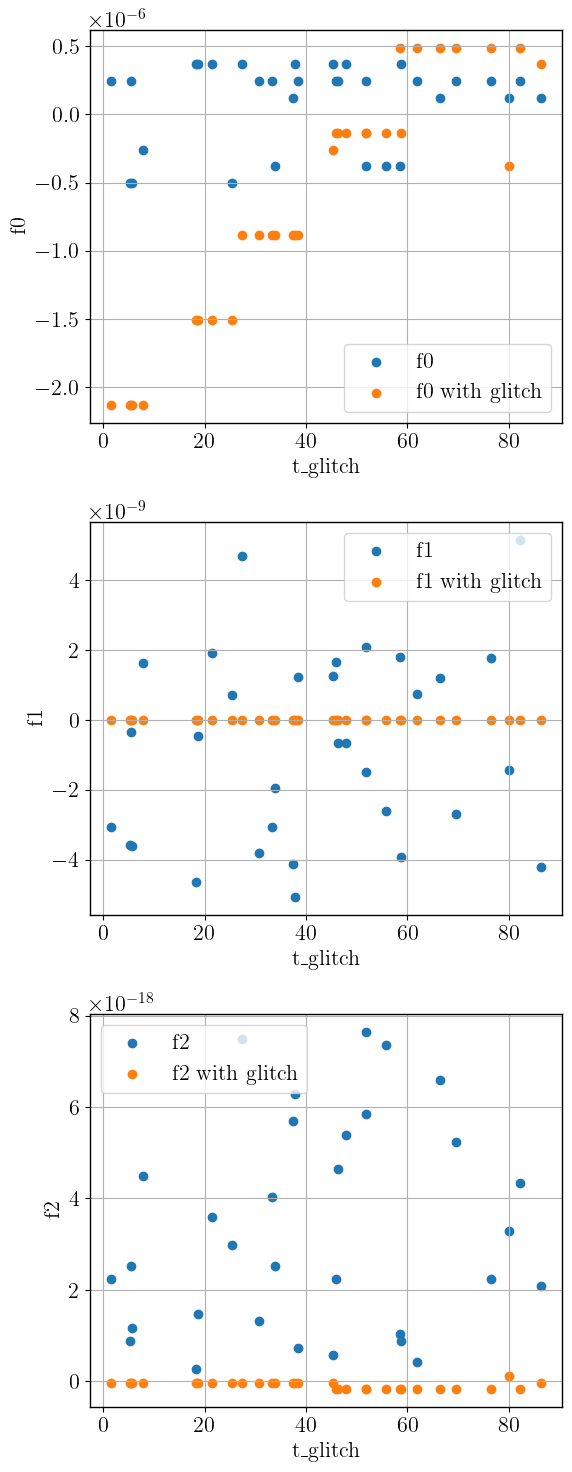

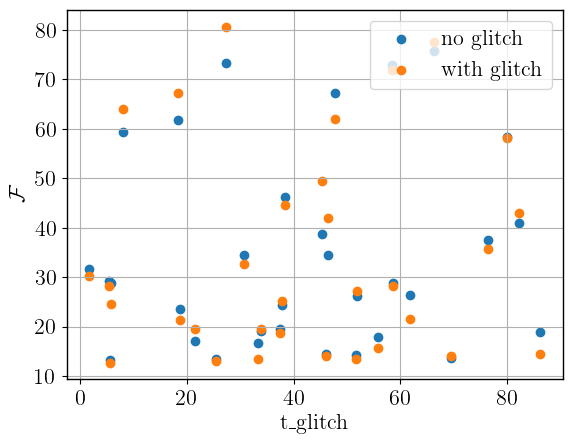

In [95]:
data = [f0_list, f1_list, f2_list]
truth = [f0, f1, f2]
# Create a 1x3 subplot layout
fig, axs = plt.subplots(3, 1, figsize=(6, 15))

for i, (ax, fdata, t) in enumerate(zip(axs, data, truth)):
    ax.scatter(t_glitch, (fdata[:, 0] - t), label=f'f{i}')
    ax.scatter(t_glitch, (fdata[:, 1] - t), label=f'f{i} with glitch')
    ax.set_xlabel('t_glitch')
    ax.set_ylabel(f'f{i}')
    ax.legend()
    ax.grid(True)


plt.tight_layout()
plt.show()

plt.scatter(t_glitch, a.mean(axis=1), label='no glitch')
plt.scatter(t_glitch, b.mean(axis=1), label='with glitch')

plt.xlabel('t_glitch')
plt.ylabel(r'$\mathcal{F}$')
plt.legend(loc=1)
plt.grid(True)

/tmp/ipykernel_105418/3664290385.py:46: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc=1)


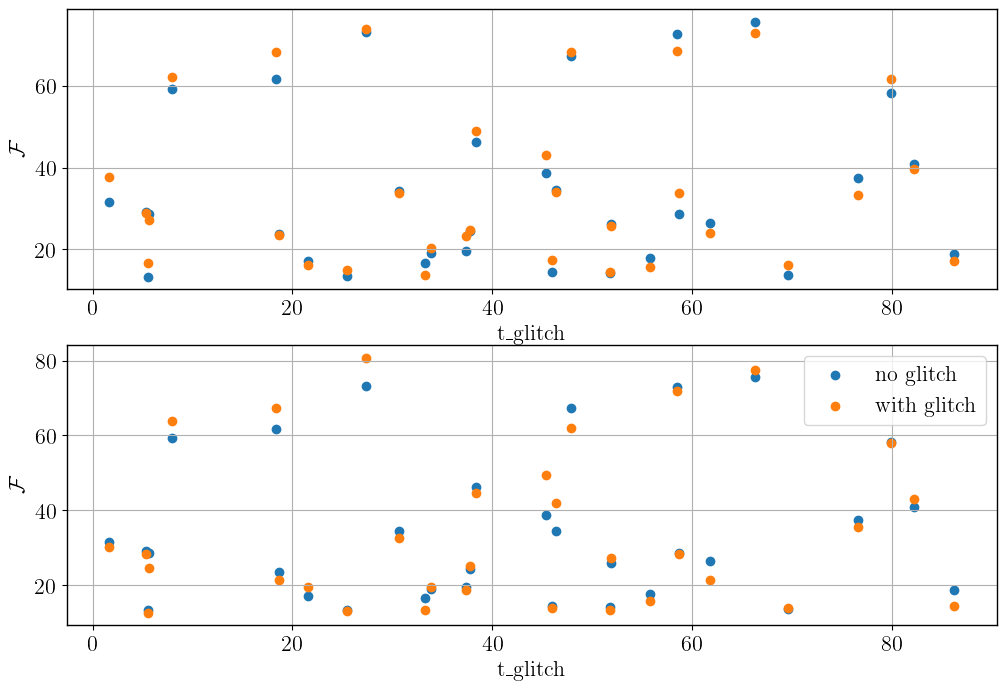

In [104]:
# Load the CSV file
df = pd.read_csv('./data/with_glitch_onlytglitch/100-100Hz/signal_glitch_params.csv')

# Extract parameters
n_glitch = 1  # n glitch per signal
f0 = df['f0'][::n_glitch].values # size of 32
f1 = df['f1'][::n_glitch].values
f2 = df['f2'][::n_glitch].values
df_p = df['df_p'].values # Take every other to match size 32
df_t = df['df_t'].values
df1_p = df['df1_p'].values
q = df['Q'].values

t_glitch = df['tglitch_day'].values

a = np.zeros((32,20))
b = np.zeros((32,20))
f0_list = np.zeros((32,2))
f1_list = np.zeros((32,2))
f2_list = np.zeros((32,2))
for i in range(32):
    d1 = fits.open(f'./results/5d/no_glitch/100-100Hz/no_glitch_CW{i}.fts')
    d2 = fits.open(f'./results/5d/with_glitch_onlytglitch/100-100Hz/with_glitch_onlytglitch_CW{i}.fts')

    a[i] = d1[1].data['coh2F_H1'][0]
    b[i] = d2[1].data['coh2F_H1'][0]
    
    f0_list[i,0] = d1[1].data['freq'][0]
    f1_list[i,0] = d1[1].data['f1dot'][0]
    f2_list[i,0] = d1[1].data['f2dot'][0]
    
    f0_list[i,1] = d2[1].data['freq'][0]
    f1_list[i,1] = d2[1].data['f1dot'][0]
    f2_list[i,1] = d2[1].data['f2dot'][0]
    
    
# Create a 1x3 subplot layout
fig, ax = plt.subplots(2, 1, figsize=(12, 8))


ax[0].scatter(t_glitch, a.mean(axis=1), label='no glitch')
ax[0].scatter(t_glitch, b.mean(axis=1), label='with glitch')

ax[0].set_xlabel('t_glitch')
ax[0].set_ylabel(r'$\mathcal{F}$')
plt.legend(loc=1)
ax[0].grid(True)

# Load the CSV file
df = pd.read_csv('./data/with_glitch_onlytglitch/100-100Hz/signal_glitch_params.csv')

# Extract parameters
n_glitch = 1  # n glitch per signal
f0 = df['f0'][::n_glitch].values # size of 32
f1 = df['f1'][::n_glitch].values
f2 = df['f2'][::n_glitch].values
df_p = df['df_p'].values # Take every other to match size 32
df_t = df['df_t'].values
df1_p = df['df1_p'].values
q = df['Q'].values

t_glitch = df['tglitch_day'].values

a = np.zeros((32,20))
b = np.zeros((32,20))
f0_list = np.zeros((32,2))
f1_list = np.zeros((32,2))
f2_list = np.zeros((32,2))
for i in range(32):
    d1 = fits.open(f'./results/5d/no_glitch/100-100Hz/no_glitch_CW{i}.fts')
    d2 = fits.open(f'./results/5d/with_glitch_onlytglitch_consth0/100-100Hz/with_glitch_onlytglitch_consth0_CW{i}.fts')

    a[i] = d1[1].data['coh2F_H1'][0]
    b[i] = d2[1].data['coh2F_H1'][0]
    
    f0_list[i,0] = d1[1].data['freq'][0]
    f1_list[i,0] = d1[1].data['f1dot'][0]
    f2_list[i,0] = d1[1].data['f2dot'][0]
    
    f0_list[i,1] = d2[1].data['freq'][0]
    f1_list[i,1] = d2[1].data['f1dot'][0]
    f2_list[i,1] = d2[1].data['f2dot'][0]
    
    


ax[1].scatter(t_glitch, a.mean(axis=1), label='no glitch')
ax[1].scatter(t_glitch, b.mean(axis=1), label='with glitch')

ax[1].set_xlabel('t_glitch')
ax[1].set_ylabel(r'$\mathcal{F}$')
plt.legend(loc=1)
ax[1].grid(True)


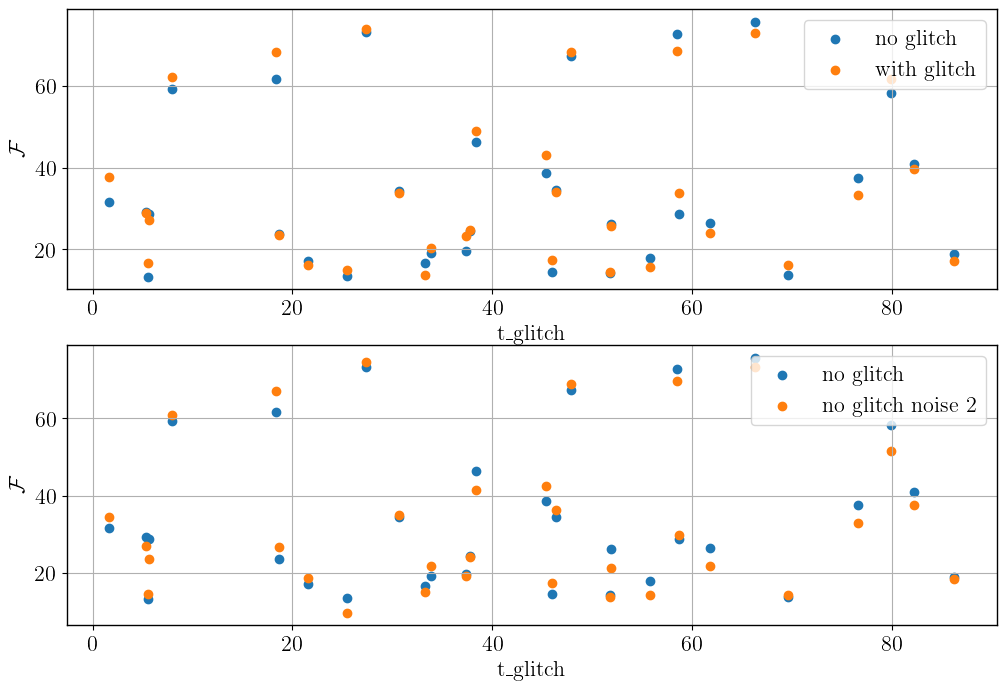

In [107]:
# Load the CSV file
df = pd.read_csv('./data/with_glitch_onlytglitch/100-100Hz/signal_glitch_params.csv')

# Extract parameters
n_glitch = 1  # n glitch per signal
f0 = df['f0'][::n_glitch].values # size of 32
f1 = df['f1'][::n_glitch].values
f2 = df['f2'][::n_glitch].values
df_p = df['df_p'].values # Take every other to match size 32
df_t = df['df_t'].values
df1_p = df['df1_p'].values
q = df['Q'].values

t_glitch = df['tglitch_day'].values

a = np.zeros((32,20))
b = np.zeros((32,20))
f0_list = np.zeros((32,2))
f1_list = np.zeros((32,2))
f2_list = np.zeros((32,2))
for i in range(32):
    d1 = fits.open(f'./results/5d/no_glitch/100-100Hz/no_glitch_CW{i}.fts')
    d2 = fits.open(f'./results/5d/with_glitch_onlytglitch/100-100Hz/with_glitch_onlytglitch_CW{i}.fts')

    a[i] = d1[1].data['coh2F_H1'][0]
    b[i] = d2[1].data['coh2F_H1'][0]
    
    f0_list[i,0] = d1[1].data['freq'][0]
    f1_list[i,0] = d1[1].data['f1dot'][0]
    f2_list[i,0] = d1[1].data['f2dot'][0]
    
    f0_list[i,1] = d2[1].data['freq'][0]
    f1_list[i,1] = d2[1].data['f1dot'][0]
    f2_list[i,1] = d2[1].data['f2dot'][0]
    
# Create a 1x3 subplot layout
fig, ax = plt.subplots(2, 1, figsize=(12, 8))


ax[0].scatter(t_glitch, a.mean(axis=1), label='no glitch')
ax[0].scatter(t_glitch, b.mean(axis=1), label='with glitch')

ax[0].set_xlabel('t_glitch')
ax[0].set_ylabel(r'$\mathcal{F}$')
ax[0].legend(loc=1)
ax[0].grid(True)

# Load the CSV file
df = pd.read_csv('./data/with_glitch_onlytglitch/100-100Hz/signal_glitch_params.csv')

# Extract parameters
n_glitch = 1  # n glitch per signal
f0 = df['f0'][::n_glitch].values # size of 32
f1 = df['f1'][::n_glitch].values
f2 = df['f2'][::n_glitch].values
df_p = df['df_p'].values # Take every other to match size 32
df_t = df['df_t'].values
df1_p = df['df1_p'].values
q = df['Q'].values

t_glitch = df['tglitch_day'].values

a = np.zeros((32,20))
b = np.zeros((32,20))
f0_list = np.zeros((32,2))
f1_list = np.zeros((32,2))
f2_list = np.zeros((32,2))
for i in range(32):
    d1 = fits.open(f'./results/5d/no_glitch/100-100Hz/no_glitch_CW{i}.fts')
    d2 = fits.open(f'./results/5d/no_glitch_diffnoise/100-100Hz/no_glitch_diffnoise_CW{i}.fts')

    a[i] = d1[1].data['coh2F_H1'][0]
    b[i] = d2[1].data['coh2F_H1'][0]
    
    f0_list[i,0] = d1[1].data['freq'][0]
    f1_list[i,0] = d1[1].data['f1dot'][0]
    f2_list[i,0] = d1[1].data['f2dot'][0]
    
    f0_list[i,1] = d2[1].data['freq'][0]
    f1_list[i,1] = d2[1].data['f1dot'][0]
    f2_list[i,1] = d2[1].data['f2dot'][0]
    
ax[1].scatter(t_glitch, a.mean(axis=1), label='no glitch')
ax[1].scatter(t_glitch, b.mean(axis=1), label='no glitch noise 2')

ax[1].set_xlabel('t_glitch')
ax[1].set_ylabel(r'$\mathcal{F}$')
ax[1].legend(loc=1)
ax[1].grid(True)


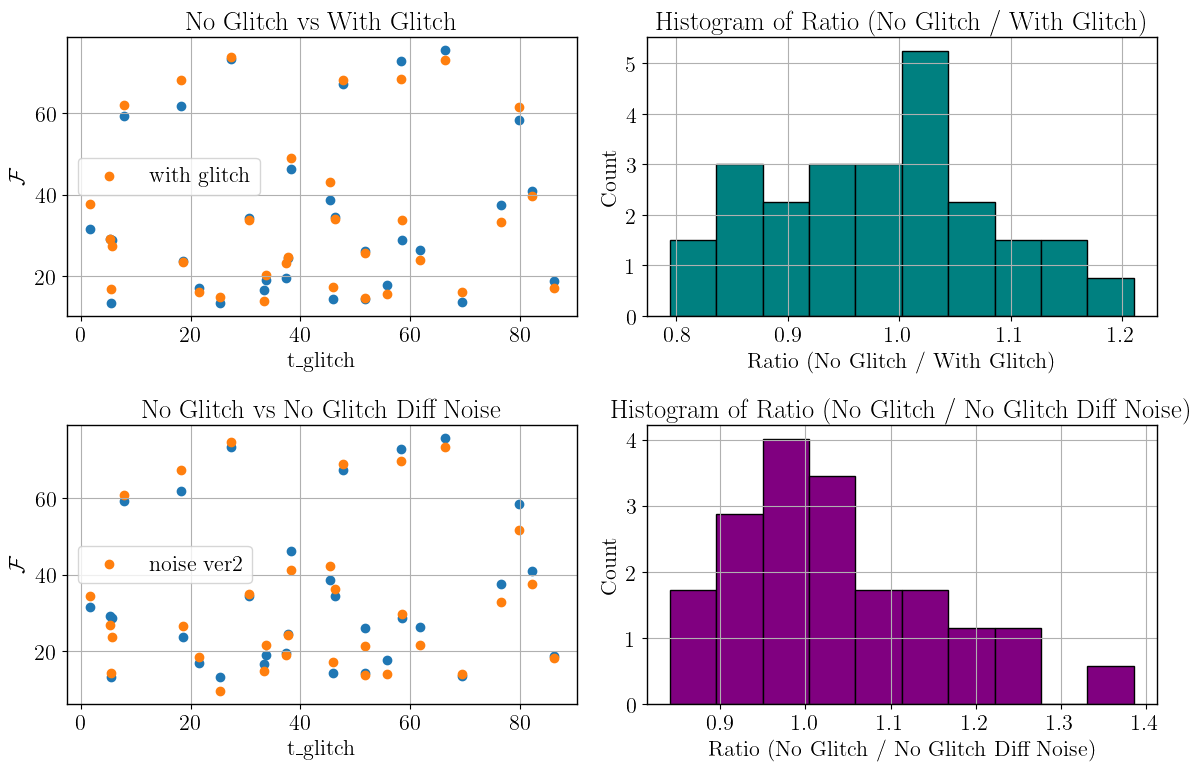

In [126]:
import pandas as pd
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('./data/with_glitch_onlytglitch/100-100Hz/signal_glitch_params.csv')

# Extract parameters
n_glitch = 1  # n glitch per signal
f0 = df['f0'][::n_glitch].values  # size of 32
f1 = df['f1'][::n_glitch].values
f2 = df['f2'][::n_glitch].values
df_p = df['df_p'].values
df_t = df['df_t'].values
df1_p = df['df1_p'].values
q = df['Q'].values
t_glitch = df['tglitch_day'].values

# Initialize arrays
a1 = np.zeros((32, 20))
b1 = np.zeros((32, 20))
a2 = np.zeros((32, 20))
b2 = np.zeros((32, 20))
f0_list = np.zeros((32, 2))
f1_list = np.zeros((32, 2))
f2_list = np.zeros((32, 2))

# Load data
for i in range(32):
    d1 = fits.open(f'./results/5d/no_glitch/100-100Hz/no_glitch_CW{i}.fts')
    d2 = fits.open(f'./results/5d/with_glitch_onlytglitch/100-100Hz/with_glitch_onlytglitch_CW{i}.fts')
    d3 = fits.open(f'./results/5d/no_glitch_diffnoise/100-100Hz/no_glitch_diffnoise_CW{i}.fts')

    a1[i] = d1[1].data['coh2F_H1'][0]
    b1[i] = d2[1].data['coh2F_H1'][0]
    a2[i] = d1[1].data['coh2F_H1'][0]
    b2[i] = d3[1].data['coh2F_H1'][0]

    f0_list[i, 0] = d1[1].data['freq'][0]
    f1_list[i, 0] = d1[1].data['f1dot'][0]
    f2_list[i, 0] = d1[1].data['f2dot'][0]

    f0_list[i, 1] = d2[1].data['freq'][0]
    f1_list[i, 1] = d2[1].data['f1dot'][0]
    f2_list[i, 1] = d2[1].data['f2dot'][0]

# Create a 2x2 subplot layout
fig, ax = plt.subplots(2, 2, figsize=(12, 8))

# Scatter plot: No Glitch vs With Glitch
ax[0, 0].scatter(t_glitch, a1.mean(axis=1))
ax[0, 0].scatter(t_glitch, b1.mean(axis=1), label='with glitch')
ax[0, 0].set_xlabel('t_glitch')
ax[0, 0].set_ylabel(r'$\mathcal{F}$')
ax[0, 0].legend()
ax[0, 0].grid(True)
ax[0, 0].set_title('No Glitch vs With Glitch')

# Histogram: Ratio (No Glitch / With Glitch)
ratios1 = a1.mean(axis=1) / b1.mean(axis=1)
ax[0, 1].hist(ratios1, bins=10, color='teal', edgecolor='black', density=True)
ax[0, 1].set_xlabel('Ratio (No Glitch / With Glitch)')
ax[0, 1].set_ylabel('Count')
ax[0, 1].grid(True)
ax[0, 1].set_title('Histogram of Ratio (No Glitch / With Glitch)')

# Scatter plot: No Glitch vs No Glitch Diff Noise
ax[1, 0].scatter(t_glitch, a2.mean(axis=1))
ax[1, 0].scatter(t_glitch, b2.mean(axis=1), label='noise ver2')
ax[1, 0].set_xlabel('t_glitch')
ax[1, 0].set_ylabel(r'$\mathcal{F}$')
ax[1, 0].legend()
ax[1, 0].grid(True)
ax[1, 0].set_title('No Glitch vs No Glitch Diff Noise')

# Histogram: Ratio (No Glitch / No Glitch Diff Noise)
ratios2 = a2.mean(axis=1) / b2.mean(axis=1)
ax[1, 1].hist(ratios2, bins=10, color='purple', edgecolor='black', density=True)
ax[1, 1].set_xlabel('Ratio (No Glitch / No Glitch Diff Noise)')
ax[1, 1].set_ylabel('Count')
ax[1, 1].grid(True)
ax[1, 1].set_title('Histogram of Ratio (No Glitch / No Glitch Diff Noise)')

# Adjust layout
plt.tight_layout()
plt.show()

In [121]:
(d1[1].data['mean2F'][0]-4)**0.5

5.511691065663996

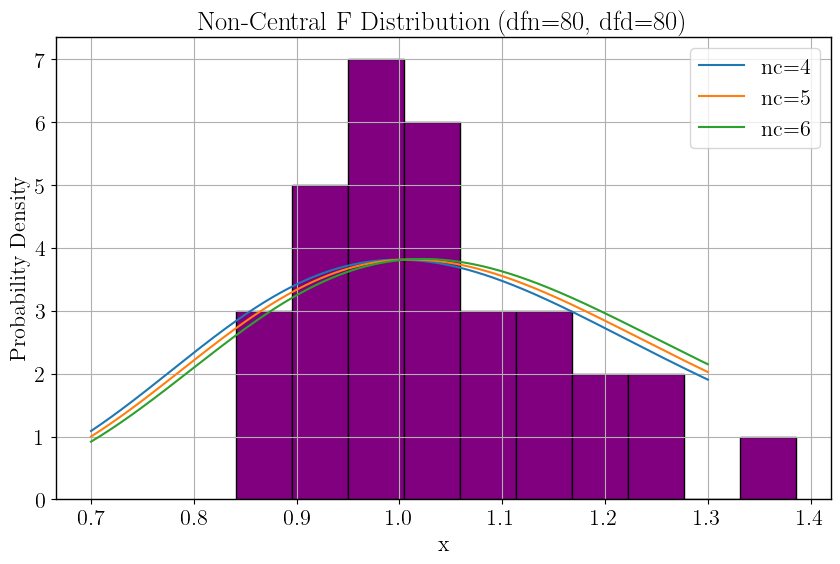

In [139]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ncf

# Parameters for the non-central F distribution
dfn = 80  # Numerator degrees of freedom
dfd = 80  # Denominator degrees of freedom
nc_values = [4, 5, 6]  # Non-centrality parameters (try different values)

# Create a range of x values for plotting the PDF
x = np.linspace(0.7, 1.3, 1000)  # Adjust range as needed for your parameters

# Create a figure
plt.figure(figsize=(10, 6))

# Plot the PDF for each non-centrality parameter
for nc in nc_values:
    # Compute the PDF of the non-central F distribution
    pdf = ncf.pdf(x, dfn, dfd, nc)
    plt.plot(x, pdf/np.trapz(pdf, x)*32*0.05442818, label=f'nc={nc}')

    
ratios2 = a2.mean(axis=1) / b2.mean(axis=1)
a = plt.hist(ratios2, bins=10, color='purple', edgecolor='black')
# Add labels and title
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title(f'Non-Central F Distribution (dfn={dfn}, dfd={dfd})')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()